# Predicting Heart Disease Using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition 

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?


## 2. Data

The original data came from Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not the patient has heart disease during the proof of concept, we'll pursue the project.


## 4. Features

This is where you'll get different information about each features in your data

**Create data dictionary**

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* target: the predicted attribute

# Preparing the tools
We're going to use Pandas, Matplotlib and NumPy for data analysis and manipulation

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from SciKit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

## Load Data

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.shape # (rows, columns)

(303, 14)

## Data Exploratory (exploratory data analysis or EDA)

The goal here is to find out more about the data and to become a subject matter expert on the data you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how to we treat the different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
len(heart_disease)

303

In [4]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Let's find out how many of each class in the data (Binary Classification Or Multiclassification)
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

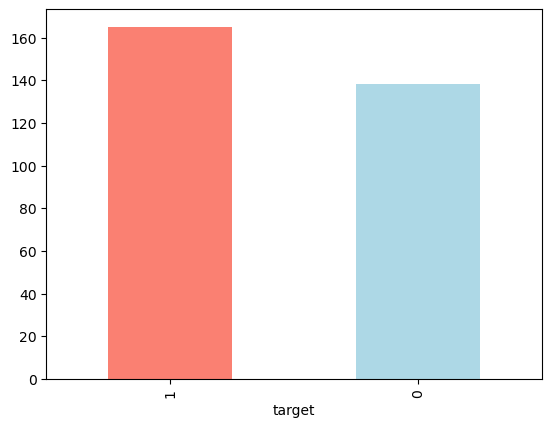

In [6]:
heart_disease["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.show()

In [7]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing data
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency According to Sex

In [10]:
heart_disease.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(heart_disease.target, heart_disease.sex)

sex,0,1
target,,
0,24,114
1,72,93


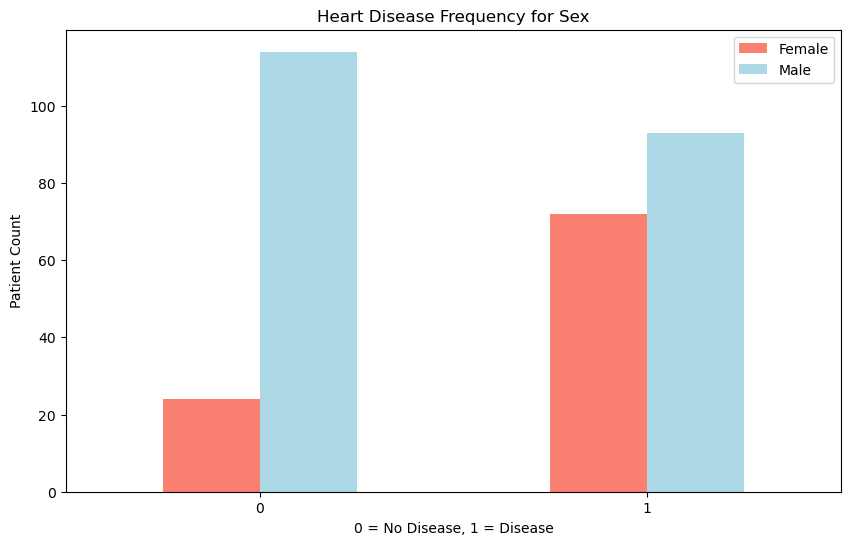

In [12]:
# Create a plot of CrossTab
pd.crosstab(heart_disease.target, heart_disease.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Patient Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show()

## Heart Disease According To Chest Pain Type

In [13]:
# Compare target with chest pain type
#        -- Value 0: typical angina
#        -- Value 1: atypical angina
#        -- Value 2: non-anginal pain
#        -- Value 3: asymptomatc pain
pd.crosstab(heart_disease["target"], heart_disease["cp"])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


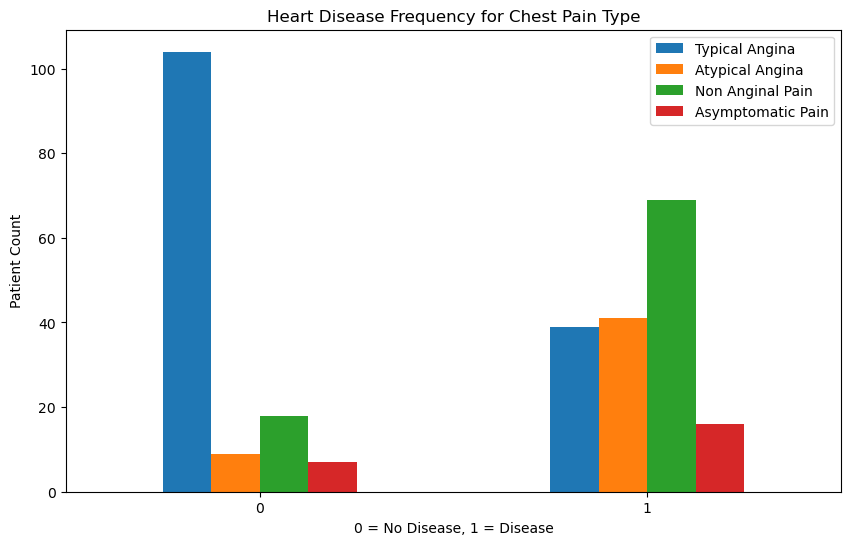

In [14]:
# Create a plot of CrossTab For Chest pain type and target
pd.crosstab(heart_disease.target, heart_disease.cp).plot(kind="bar", figsize=(10, 6))
plt.title("Heart Disease Frequency for Chest Pain Type")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Patient Count")
plt.legend(["Typical Angina", "Atypical Angina", "Non Anginal Pain", "Asymptomatic Pain"])
plt.xticks(rotation=0)
plt.show()

In [15]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Age vs Max Heart Rate for Heart Disease

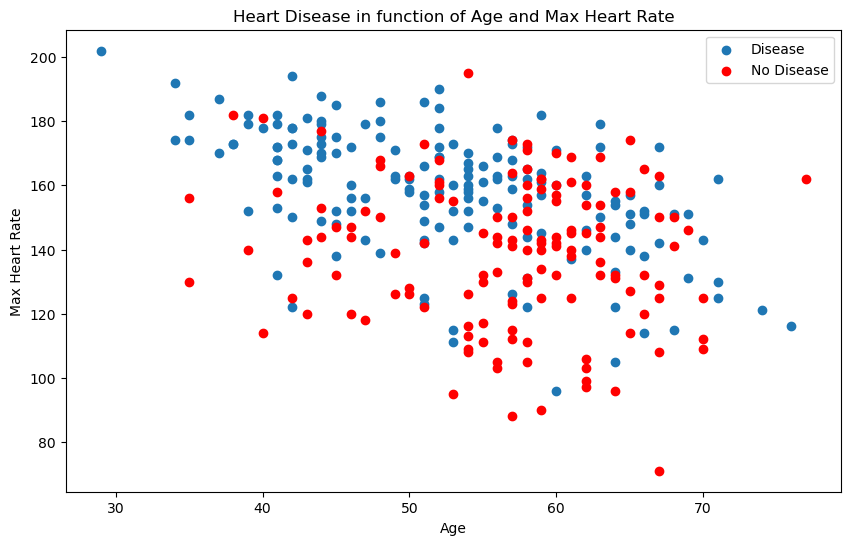

In [16]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(heart_disease.age[heart_disease.target == 1], heart_disease.thalach[heart_disease.target == 1])

# Scatter with negative examples
plt.scatter(heart_disease.age[heart_disease.target == 0], heart_disease.thalach[heart_disease.target == 0], color="red")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.show()

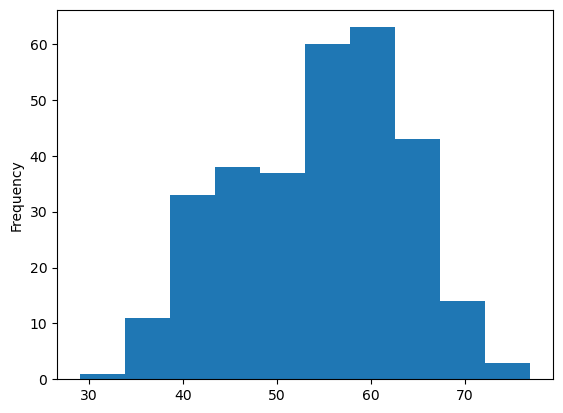

In [17]:
# Check the distribution of the age column with a histogram
heart_disease.age.plot.hist()
plt.show()

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Make a correlation matrix (To determine the independent and dependent variables and how they relate to each other)
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


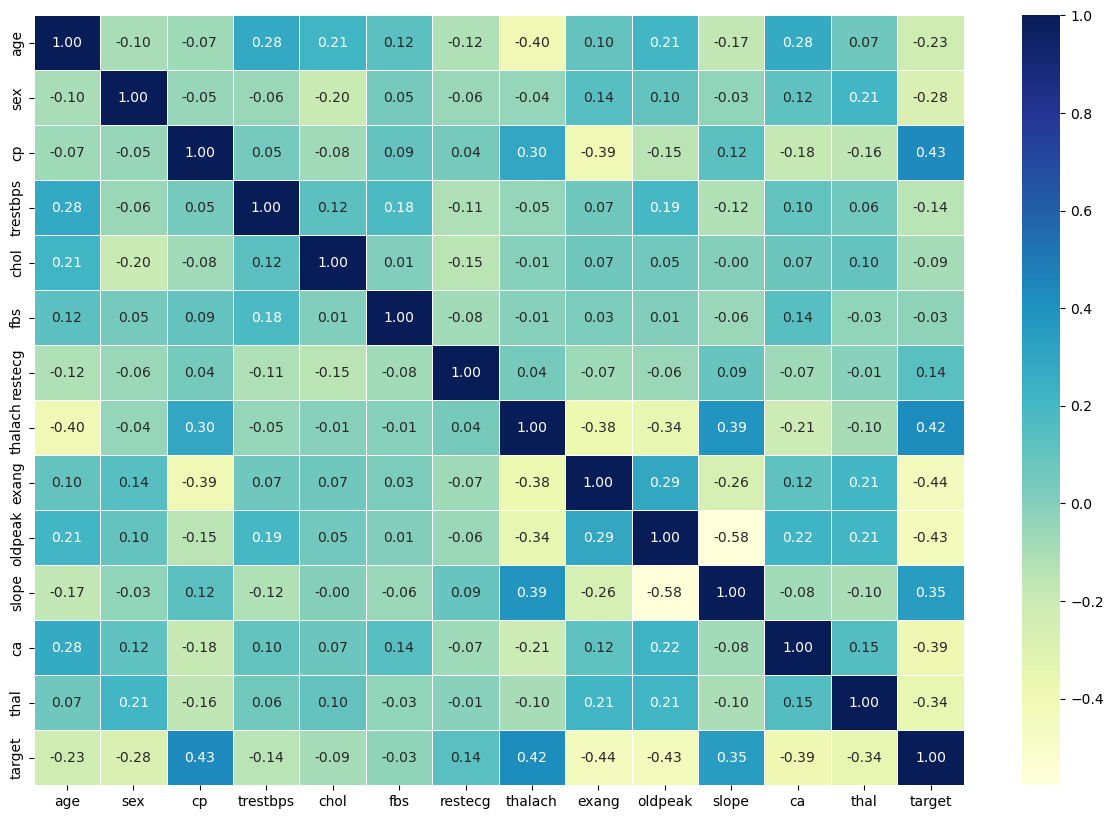

In [20]:
# Let's make our correlation matrix visual to determine what is happening
corr_matrix = heart_disease.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");
plt.show()

## 5. Modelling

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Split data into X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [23]:
# Split data into training and test split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

 Now we've got our data split into training and test sets, it's time to train the model
 
 We'll train it (find the patterns) on the training set.
 
 And we'll test it the using the test data 

 We're going to try 3 different machine learning models:

 1. Logistics Regression
 2. K-Nearest Neighbor Classifier
 3. Random Forest Classifier

In [24]:
# Put Models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit ad score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dict of different SciKit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training  labels
    y_test: test labels
    """
    # Set up random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append it's score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/Users/cicerothoma/project/ml-project-1/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

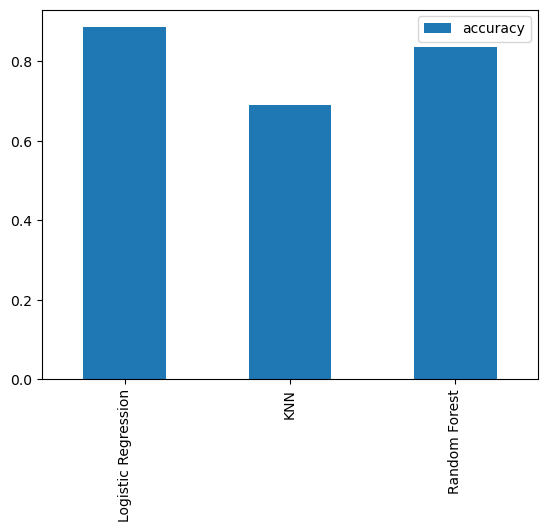

In [26]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.show()

Now we got a baseline model... and we know a model's first prediction aren't always what we should based our next steps off, what should we do?

Let's look at the following:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Precision
* Recall
* F1 Score
* Classification report
* ROC Curve
* Area under the curve (AUC)

### Hyperparameter Tuning (by hand)

In [27]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the Algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test score list
    test_scores.append(knn.score(X_test, y_test))

In [28]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [29]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [30]:
max(test_scores)

0.7540983606557377

Maximum KNN score on the test data: 75.41%


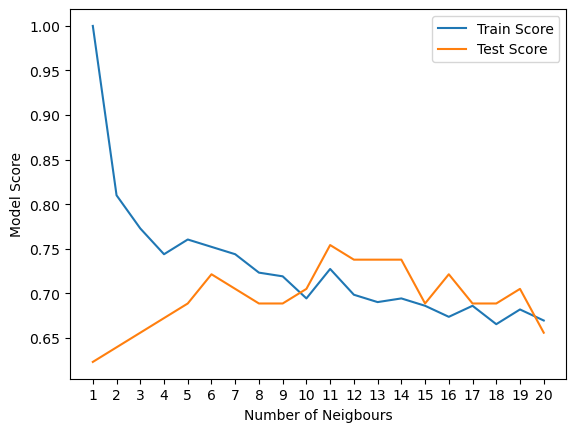

In [31]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neigbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%")
plt.show()

## Hyperparameter Tuning with RandomizedSearchCV

We're going to tune:

* LogisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV

In [32]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 50), "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50), "max_depth": [None, 3, 5, 10], "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using **RandomizedSearchCV**...

In [33]:
# Tune Logistics Regression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=5)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=0.013257113655901081, solver=liblinear;, score=0.776 total time=   0.0s
[CV 2/5] END C=0.013257113655901081, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=0.013257113655901081, solver=liblinear;, score=0.729 total time=   0.0s
[CV 4/5] END C=0.013257113655901081, solver=liblinear;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.013257113655901081, solver=liblinear;, score=0.771 total time=   0.0s
[CV 1/5] END C=232.99518105153672, solver=liblinear;, score=0.776 total time=   0.0s
[CV 2/5] END C=232.99518105153672, solver=liblinear;, score=0.918 total time=   0.0s
[CV 3/5] END C=232.99518105153672, solver=liblinear;, score=0.771 total time=   0.0s
[CV 4/5] END C=232.99518105153672, solver=liblinear;, score=0.833 total time=   0.0s
[CV 5/5] END C=232.99518105153672, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=7.9060432109076855, solver=liblinear;, score=0.776 total time= 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=5)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.12648552168552957}

In [35]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned `LogisticRegression()`, let's do the same for `RandomForestClassifier()`

In [36]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=2)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .max_depth=10, min_samples_leaf=9, n_estimators=810; total time=   0.6s
[CV] END .max_depth=10, min_samples_leaf=9, n_estimators=810; total time=   0.4s
[CV] END .max_depth=10, min_samples_leaf=9, n_estimators=810; total time=   0.4s
[CV] END .max_depth=10, min_samples_leaf=9, n_estimators=810; total time=   0.4s
[CV] END .max_depth=10, min_samples_leaf=9, n_estimators=810; total time=   0.6s
[CV] END .max_depth=10, min_samples_leaf=7, n_estimators=360; total time=   0.2s
[CV] END .max_depth=10, min_samples_leaf=7, n_estimators=360; total time=   0.2s
[CV] END .max_depth=10, min_samples_leaf=7, n_estimators=360; total time=   0.2s
[CV] END .max_depth=10, min_samples_leaf=7, n_estimators=360; total time=   0.2s
[CV] END .max_depth=10, min_samples_leaf=7, n_estimators=360; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=7, n_estimators=160; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, n

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [37]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 760, 'min_samples_leaf': 19, 'max_depth': 3}

In [38]:
# Score the model with test data
rs_rf.score(X_test, y_test)

0.8688524590163934

In [39]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter Tuning with GridSearchCV

Since the Logistic Regression model provides the best scores so far, we'll try and improve them again using the **GridSearchCV**...

In [40]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30), "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, verbose=2, cv=5)

# Fit our grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [41]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating out tuned machine learning classifier, beyond accuracy

* ROC curve and AUC Score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-score

...and it would be great if we could use cross-validation where possible

To make comparisons and evaluate our trained model, first we need to make predictions

In [42]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

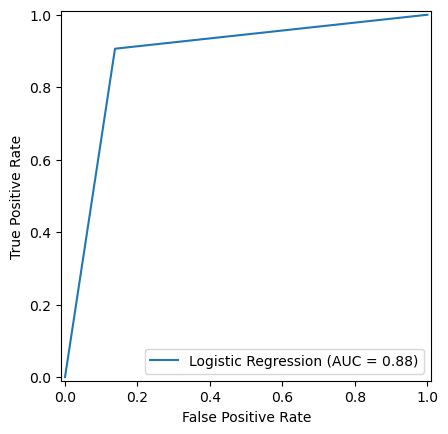

In [43]:
# Plot ROC curve and calculate AUC metric
fpr, tpr, threshold = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Logistic Regression")
display.plot()
plt.show()

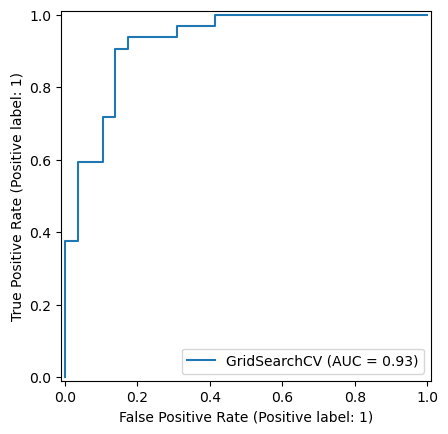

In [44]:
# Another way to plot the roc_curve from the Estimator
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

In [45]:
# Confusion matrix

print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


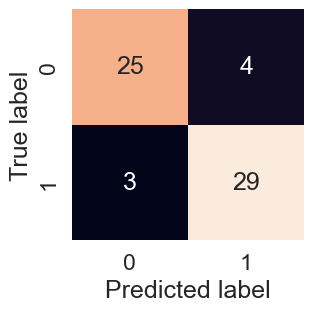

In [46]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    plt.show()
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1 score

In [47]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [48]:
# Set up a new Logistic Regression model with out best hyperparameter from our GridSearchCV

# Check best param
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [49]:
# Set Model with best param
clf = LogisticRegression(C=np.float64(0.20433597178569418), solver='liblinear')

In [50]:
# Cross Validated Accuracy

cv_accuracy = cross_val_score(clf, X, y, scoring="accuracy", cv=5)

cv_accuracy = cv_accuracy.mean()

In [51]:
# Cross Validated Precision
cv_precision = cross_val_score(clf, X, y, scoring="precision", cv=5)

cv_precision = cv_precision.mean()

In [52]:
# Cross Validated Recall
cv_recall = cross_val_score(clf, X, y, scoring="recall", cv=5)

cv_recall = cv_recall.mean()

In [53]:
# Cross Validated F1 score
cv_f1_score = cross_val_score(clf, X, y, scoring="f1", cv=5)

cv_f1_score = cv_f1_score.mean()

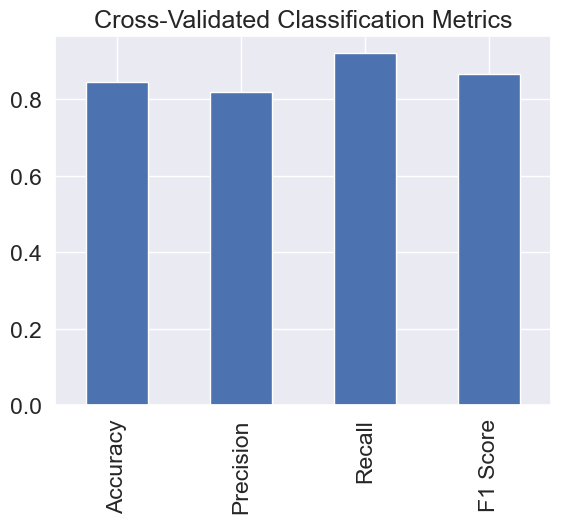

In [54]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_accuracy,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1 Score": cv_f1_score},
                            index=[0])

cv_metrics.T.plot(kind="bar", title="Cross-Validated Classification Metrics", legend=False)
plt.show()

In [55]:
cv_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.844699,0.820794,0.921212,0.867301


### Feature Importance

Feature importance is another way as asking "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. 

You should research how to find the feature importance for the model you're using

In [56]:
# Set Model with best param and fit the model
clf = LogisticRegression(C=np.float64(0.20433597178569418), solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [57]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [58]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
# Match coef_ to data columns
feature_dict = dict(zip(heart_disease.columns, clf.coef_[0]))

In [60]:
feature_dict

{'age': 0.0031672800489608455,
 'sex': -0.8604464974271708,
 'cp': 0.6606704082728109,
 'trestbps': -0.01156993196274824,
 'chol': -0.0016637440923087717,
 'fbs': 0.04386107313075342,
 'restecg': 0.3127584615862929,
 'thalach': 0.02459361332045646,
 'exang': -0.6041307948760266,
 'oldpeak': -0.568628039197438,
 'slope': 0.4505162753782247,
 'ca': -0.636098965095586,
 'thal': -0.6766337239240338}

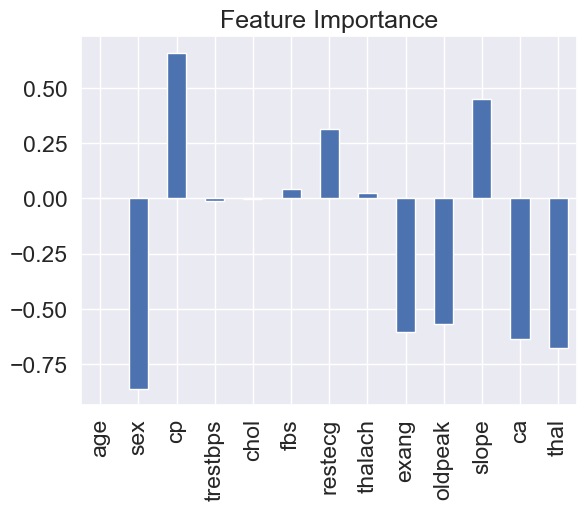

In [61]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(kind="bar", title="Feature Importance", legend=False)
plt.show()

## 6. Experimentation

If you haven't hit your evaluation metrix yet... ask yourself...

* Could you collect more data
* Could you try a better model? Like CatBoost or XGBoost
* Could you import the current models? (beyond what we've done so far)
* If your project is good enough (you have hit your evaluation metrics) how would you share it with others?

In [62]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [63]:
np.array(X_test.loc[60]).shape

(13,)

In [64]:
heart_disease.shape

(303, 14)

In [65]:
data = pd.DataFrame(np.array(X_test.loc[60]), index=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"])

In [66]:
data

,0
age,71.0
sex,0.0
cp,2.0
trestbps,110.0
chol,265.0
fbs,1.0
restecg,0.0
thalach,130.0
exang,0.0
oldpeak,0.0


In [67]:
data.T

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,71.0,0.0,2.0,110.0,265.0,1.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0


In [68]:
data.T

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,71.0,0.0,2.0,110.0,265.0,1.0,0.0,130.0,0.0,0.0,2.0,1.0,2.0


In [69]:
feature_df.shape

(1, 13)

In [70]:
clf.predict(data.T)

array([1])

In [71]:
data = pd.DataFrame({
    "age": 65,
    "sex": 0,
    "cp": 2,
    "trestbps": 170,
    "chol": 286,
    "fbs": 1,
    "restecg": 1,
    "thalach": 121,
    "exang": 0,
    "oldpeak": 0.6,
    "slope": 2,
    "ca": 0,
    "thal": 3
}, index=[0])

In [72]:
clf.predict(data)

array([1])

# Trying Out CatBoost

In [73]:
from catboost import CatBoostClassifier

In [74]:
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]

In [75]:
model = CatBoostClassifier(iterations=100, depth=8, learning_rate=0.2, cat_features=categorical_features, random_seed=42)

In [76]:
model.fit(X_train, y_train)

0:	learn: 0.6593733	total: 62.1ms	remaining: 6.14s
1:	learn: 0.6251222	total: 63.8ms	remaining: 3.13s
2:	learn: 0.5842468	total: 65.2ms	remaining: 2.11s
3:	learn: 0.5583829	total: 66.6ms	remaining: 1.6s
4:	learn: 0.5328256	total: 68.2ms	remaining: 1.29s
5:	learn: 0.4980848	total: 68.6ms	remaining: 1.07s
6:	learn: 0.4754221	total: 70ms	remaining: 929ms
7:	learn: 0.4575551	total: 71.3ms	remaining: 820ms
8:	learn: 0.4430834	total: 72.6ms	remaining: 735ms
9:	learn: 0.4263460	total: 73ms	remaining: 657ms
10:	learn: 0.4071687	total: 74.5ms	remaining: 602ms
11:	learn: 0.3983189	total: 75.8ms	remaining: 556ms
12:	learn: 0.3858032	total: 76.8ms	remaining: 514ms
13:	learn: 0.3755065	total: 77.9ms	remaining: 479ms
14:	learn: 0.3642761	total: 79.2ms	remaining: 449ms
15:	learn: 0.3567320	total: 80.3ms	remaining: 421ms
16:	learn: 0.3480180	total: 81ms	remaining: 396ms
17:	learn: 0.3408886	total: 82.2ms	remaining: 375ms
18:	learn: 0.3325678	total: 83.3ms	remaining: 355ms
19:	learn: 0.3266641	total: 8

In [77]:
model.score(X_test, y_test)

0.8524590163934426

In [78]:
grid = {
    "learning_rate": [0.03, 0.06],
    "depth": [3, 6, 9],
    "l2_leaf_reg": [2, 3, 4],
    "boosting_type": ["Ordered", "Plain"]
}

grid_search_model = CatBoostClassifier(iterations=100, random_seed=42)
grid_search_result = grid_search_model.grid_search(grid, X_train, y_train)

0:	learn: 0.6714737	test: 0.6747090	best: 0.6747090 (0)	total: 4.42ms	remaining: 438ms
1:	learn: 0.6483286	test: 0.6575895	best: 0.6575895 (1)	total: 9.52ms	remaining: 466ms
2:	learn: 0.6404125	test: 0.6536757	best: 0.6536757 (2)	total: 13ms	remaining: 419ms
3:	learn: 0.6265962	test: 0.6410965	best: 0.6410965 (3)	total: 17ms	remaining: 408ms
4:	learn: 0.6083441	test: 0.6310980	best: 0.6310980 (4)	total: 19.5ms	remaining: 371ms
5:	learn: 0.5963534	test: 0.6243216	best: 0.6243216 (5)	total: 21.6ms	remaining: 338ms
6:	learn: 0.5803919	test: 0.6163736	best: 0.6163736 (6)	total: 24.5ms	remaining: 326ms
7:	learn: 0.5725003	test: 0.6105252	best: 0.6105252 (7)	total: 27ms	remaining: 311ms
8:	learn: 0.5631430	test: 0.6051799	best: 0.6051799 (8)	total: 29.1ms	remaining: 294ms
9:	learn: 0.5512117	test: 0.5945859	best: 0.5945859 (9)	total: 31.2ms	remaining: 281ms
10:	learn: 0.5420665	test: 0.5853122	best: 0.5853122 (10)	total: 33.9ms	remaining: 274ms
11:	learn: 0.5339535	test: 0.5774513	best: 0.57

In [79]:
grid_search_result["params"]

{'boosting_type': 'Ordered',
 'depth': 3,
 'learning_rate': 0.06,
 'l2_leaf_reg': 4}

In [80]:
gs_clf = CatBoostClassifier(boosting_type='Ordered', depth=3, learning_rate=0.06, l2_leaf_reg=4, iterations=100, cat_features=categorical_features, random_seed=42)

In [81]:
gs_clf.fit(X_train, y_train)

0:	learn: 0.6788256	total: 704us	remaining: 69.8ms
1:	learn: 0.6618978	total: 1.34ms	remaining: 65.8ms
2:	learn: 0.6495750	total: 1.98ms	remaining: 64.1ms
3:	learn: 0.6386865	total: 2.43ms	remaining: 58.4ms
4:	learn: 0.6261707	total: 2.81ms	remaining: 53.3ms
5:	learn: 0.6131299	total: 3.16ms	remaining: 49.5ms
6:	learn: 0.6032290	total: 3.51ms	remaining: 46.6ms
7:	learn: 0.5901345	total: 3.89ms	remaining: 44.7ms
8:	learn: 0.5790846	total: 4.33ms	remaining: 43.7ms
9:	learn: 0.5677334	total: 4.68ms	remaining: 42.1ms
10:	learn: 0.5574428	total: 5.03ms	remaining: 40.7ms
11:	learn: 0.5485009	total: 5.66ms	remaining: 41.5ms
12:	learn: 0.5421423	total: 6.11ms	remaining: 40.9ms
13:	learn: 0.5370602	total: 6.49ms	remaining: 39.9ms
14:	learn: 0.5306659	total: 6.87ms	remaining: 38.9ms
15:	learn: 0.5235600	total: 7.24ms	remaining: 38ms
16:	learn: 0.5159138	total: 7.55ms	remaining: 36.8ms
17:	learn: 0.5095892	total: 8.73ms	remaining: 39.8ms
18:	learn: 0.5029452	total: 9.32ms	remaining: 39.7ms
19:	le

In [82]:
gs_clf.score(X_test, y_test)

0.8524590163934426

In [83]:
# CatBoost Cross Validated Accuracy

cb_cv_accuracy = cross_val_score(gs_clf, X, y, scoring="accuracy", cv=5)

cb_cv_accuracy = cv_accuracy.mean()

0:	learn: 0.6755720	total: 1.02ms	remaining: 102ms
1:	learn: 0.6614741	total: 1.67ms	remaining: 81.7ms
2:	learn: 0.6460901	total: 2.31ms	remaining: 74.5ms
3:	learn: 0.6311152	total: 2.79ms	remaining: 67ms
4:	learn: 0.6206696	total: 3.25ms	remaining: 61.7ms
5:	learn: 0.6123552	total: 3.6ms	remaining: 56.5ms
6:	learn: 0.6004855	total: 3.99ms	remaining: 53ms
7:	learn: 0.5926387	total: 4.32ms	remaining: 49.6ms
8:	learn: 0.5812976	total: 4.73ms	remaining: 47.8ms
9:	learn: 0.5732539	total: 5.12ms	remaining: 46.1ms
10:	learn: 0.5632317	total: 5.5ms	remaining: 44.5ms
11:	learn: 0.5531874	total: 5.92ms	remaining: 43.4ms
12:	learn: 0.5453431	total: 6.27ms	remaining: 42ms
13:	learn: 0.5385811	total: 6.62ms	remaining: 40.7ms
14:	learn: 0.5310678	total: 7.51ms	remaining: 42.5ms
15:	learn: 0.5247928	total: 7.88ms	remaining: 41.4ms
16:	learn: 0.5178007	total: 8.21ms	remaining: 40.1ms
17:	learn: 0.5120945	total: 8.61ms	remaining: 39.2ms
18:	learn: 0.5064361	total: 8.96ms	remaining: 38.2ms
19:	learn: 0

In [84]:
# CatBoost Cross Validated Precision
cb_cv_precision = cross_val_score(gs_clf, X, y, scoring="precision", cv=5)

cb_cv_precision = cv_precision.mean()

0:	learn: 0.6755720	total: 680us	remaining: 67.4ms
1:	learn: 0.6614741	total: 1.24ms	remaining: 60.7ms
2:	learn: 0.6460901	total: 1.92ms	remaining: 61.9ms
3:	learn: 0.6311152	total: 2.25ms	remaining: 54.1ms
4:	learn: 0.6206696	total: 2.65ms	remaining: 50.4ms
5:	learn: 0.6123552	total: 3.14ms	remaining: 49.2ms
6:	learn: 0.6004855	total: 3.63ms	remaining: 48.2ms
7:	learn: 0.5926387	total: 3.96ms	remaining: 45.5ms
8:	learn: 0.5812976	total: 4.43ms	remaining: 44.8ms
9:	learn: 0.5732539	total: 5.08ms	remaining: 45.7ms
10:	learn: 0.5632317	total: 5.48ms	remaining: 44.3ms
11:	learn: 0.5531874	total: 5.85ms	remaining: 42.9ms
12:	learn: 0.5453431	total: 6.2ms	remaining: 41.5ms
13:	learn: 0.5385811	total: 6.52ms	remaining: 40.1ms
14:	learn: 0.5310678	total: 6.86ms	remaining: 38.9ms
15:	learn: 0.5247928	total: 8ms	remaining: 42ms
16:	learn: 0.5178007	total: 8.34ms	remaining: 40.7ms
17:	learn: 0.5120945	total: 8.67ms	remaining: 39.5ms
18:	learn: 0.5064361	total: 9.03ms	remaining: 38.5ms
19:	learn:

In [85]:
# CatBoost Cross Validated Recall
cb_cv_recall = cross_val_score(gs_clf, X, y, scoring="recall", cv=5)

cb_cv_recall = cv_recall.mean()

0:	learn: 0.6755720	total: 566us	remaining: 56.1ms
1:	learn: 0.6614741	total: 1.05ms	remaining: 51.5ms
2:	learn: 0.6460901	total: 1.52ms	remaining: 49.1ms
3:	learn: 0.6311152	total: 2.01ms	remaining: 48.2ms
4:	learn: 0.6206696	total: 2.41ms	remaining: 45.9ms
5:	learn: 0.6123552	total: 2.74ms	remaining: 42.9ms
6:	learn: 0.6004855	total: 3.1ms	remaining: 41.2ms
7:	learn: 0.5926387	total: 3.36ms	remaining: 38.6ms
8:	learn: 0.5812976	total: 3.68ms	remaining: 37.2ms
9:	learn: 0.5732539	total: 4.01ms	remaining: 36.1ms
10:	learn: 0.5632317	total: 4.38ms	remaining: 35.5ms
11:	learn: 0.5531874	total: 4.76ms	remaining: 34.9ms
12:	learn: 0.5453431	total: 5.27ms	remaining: 35.3ms
13:	learn: 0.5385811	total: 5.97ms	remaining: 36.7ms
14:	learn: 0.5310678	total: 7.28ms	remaining: 41.2ms
15:	learn: 0.5247928	total: 7.61ms	remaining: 39.9ms
16:	learn: 0.5178007	total: 8.29ms	remaining: 40.5ms
17:	learn: 0.5120945	total: 8.67ms	remaining: 39.5ms
18:	learn: 0.5064361	total: 9ms	remaining: 38.4ms
19:	lear

In [86]:
# Cross Validated F1 score
cb_cv_f1_score = cross_val_score(gs_clf, X, y, scoring="f1", cv=5);

cb_cv_f1_score = cv_f1_score.mean();

0:	learn: 0.6755720	total: 537us	remaining: 53.2ms
1:	learn: 0.6614741	total: 1.06ms	remaining: 52.2ms
2:	learn: 0.6460901	total: 1.54ms	remaining: 49.7ms
3:	learn: 0.6311152	total: 1.93ms	remaining: 46.3ms
4:	learn: 0.6206696	total: 2.36ms	remaining: 44.8ms
5:	learn: 0.6123552	total: 2.73ms	remaining: 42.8ms
6:	learn: 0.6004855	total: 3.19ms	remaining: 42.4ms
7:	learn: 0.5926387	total: 3.53ms	remaining: 40.6ms
8:	learn: 0.5812976	total: 3.99ms	remaining: 40.4ms
9:	learn: 0.5732539	total: 4.48ms	remaining: 40.3ms
10:	learn: 0.5632317	total: 5.21ms	remaining: 42.2ms
11:	learn: 0.5531874	total: 5.66ms	remaining: 41.5ms
12:	learn: 0.5453431	total: 6.25ms	remaining: 41.8ms
13:	learn: 0.5385811	total: 7.77ms	remaining: 47.8ms
14:	learn: 0.5310678	total: 8.31ms	remaining: 47.1ms
15:	learn: 0.5247928	total: 8.93ms	remaining: 46.9ms
16:	learn: 0.5178007	total: 9.69ms	remaining: 47.3ms
17:	learn: 0.5120945	total: 10.4ms	remaining: 47.4ms
18:	learn: 0.5064361	total: 11.8ms	remaining: 50.2ms
19:	

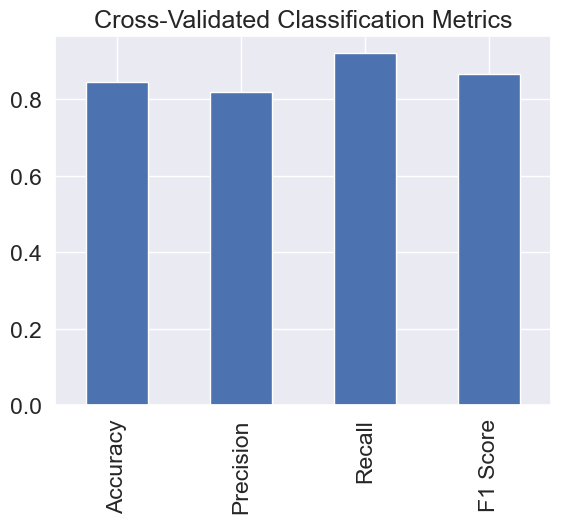

In [87]:
# Visualize cross-validated metrics
cb_cv_metrics = pd.DataFrame({"Accuracy": cb_cv_accuracy,
                          "Precision": cb_cv_precision,
                          "Recall": cb_cv_recall,
                          "F1 Score": cb_cv_f1_score},
                            index=[0])

cb_cv_metrics.T.plot(kind="bar", title="Cross-Validated Classification Metrics", legend=False)
plt.show()

In [88]:
cb_cv_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.844699,0.820794,0.921212,0.867301


In [89]:
cv_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.844699,0.820794,0.921212,0.867301


In [90]:
import joblib

In [91]:
joblib.dump(clf, "heart_disease_classifier_model.joblib")

['heart_disease_classifier_model.joblib']

In [92]:
model = joblib.load("heart_disease_classifier_model.joblib")

In [93]:
model

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [94]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])